In [72]:
import py_compile
py_compile.compile('common.py')

In [73]:
import common
reload(common)

<module 'common' from 'common.pyc'>

In [86]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

Automatically created module for IPython interactive environment


In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

class TfIdfFeatureExtractor(object):
    def __init__(self, ngram, min_df):
        self.vectorizer = TfidfVectorizer(min_df=min_df, ngram_range=(1,ngram), stop_words="english")
        
    def train(self, train_data):
        features = self.vectorizer.fit_transform(train_data["content"])
        print "Vocab size %d" % len(self.vectorizer.vocabulary_)
        return features
        
    def transform(self, test_data):
        return self.vectorizer.transform(test_data["content"])

In [75]:
common.extract_features("ka-comments-balanced", TfIdfFeatureExtractor(1, 2), "all-tfidf-1")

Loading ka-comments-balanced dataset.
Training feature extractor all-tfidf-1.
Vocab size 64542
Generating validation set...
Generating test set...
Writing to disk...
Done.


{'test_X': <5000x64542 sparse matrix of type '<type 'numpy.float64'>'
 	with 59873 stored elements in Compressed Sparse Row format>,
 'test_Y': 1132940     True
 332055     False
 1132946     True
 332056     False
 1132994     True
 332057     False
 1133006     True
 332058     False
 1133165     True
 332059     False
 1133169     True
 332060     False
 1133177     True
 332061     False
 1133179     True
 332062     False
 1133180     True
 332063     False
 1133181     True
 332064     False
 1133182     True
 332065     False
 1133183     True
 332066     False
 1133208     True
 332067     False
 1133209     True
 332068     False
 1133210     True
 332069     False
            ...  
 1145266     True
 335418     False
 1145267     True
 335419     False
 1145278     True
 335420     False
 1145382     True
 335421     False
 1145383     True
 335422     False
 1145394     True
 335423     False
 1145407     True
 335424     False
 1145408     True
 335425     False
 1145409   

In [62]:
common.test_features("all-tfidf-1")

Loading features all-tfidf-1.
Training models.
##        MultinomialNB     all-tfidf-1 accuracy: 62.2 %
##            LinearSVC     all-tfidf-1 accuracy: 62.3 %
##                  MLP     all-tfidf-1 accuracy: 63.8 %


{'LinearSVC': array([ True, False,  True, ..., False, False, False], dtype=bool),
 'MLP': array([ True, False,  True, ..., False, False, False], dtype=bool),
 'MultinomialNB': array([ True, False,  True, ..., False, False, False], dtype=bool)}

In [63]:
common.extract_features("ka-comments-balanced", TfIdfFeatureExtractor(2, 6), "all-tfidf-2")

Training feature extractor all-tfidf-2.
Vocab size 181329
Generating validation set...
Generating test set...
Writing to disk...
Done.


In [64]:
common.test_features("all-tfidf-2")

Loading features all-tfidf-2.
Training models.
##        MultinomialNB     all-tfidf-2 accuracy: 62.0 %
##            LinearSVC     all-tfidf-2 accuracy: 59.3 %
##                  MLP     all-tfidf-2 accuracy: 62.7 %


{'LinearSVC': array([ True,  True,  True, ...,  True, False, False], dtype=bool),
 'MLP': array([ True, False,  True, ..., False,  True, False], dtype=bool),
 'MultinomialNB': array([ True, False,  True, ..., False, False, False], dtype=bool)}

In [65]:
common.extract_features("ka-replies-balanced", TfIdfFeatureExtractor(1, 2), "reply-tfidf-1")

Loading ka-replies-balanced dataset.
Training feature extractor reply-tfidf-1.
Vocab size 56396
Generating validation set...
Generating test set...
Writing to disk...
Done.


In [66]:
common.test_features("reply-tfidf-1")

Loading features reply-tfidf-1.
Training models.
##        MultinomialNB   reply-tfidf-1 accuracy: 61.5 %
##            LinearSVC   reply-tfidf-1 accuracy: 61.1 %
##                  MLP   reply-tfidf-1 accuracy: 62.6 %


{'LinearSVC': array([ True, False,  True, ..., False,  True, False], dtype=bool),
 'MLP': array([ True, False, False, ..., False,  True, False], dtype=bool),
 'MultinomialNB': array([ True, False, False, ..., False,  True, False], dtype=bool)}

In [67]:
common.extract_features("ka-replies-balanced", TfIdfFeatureExtractor(2, 6), "reply-tfidf-2")

Training feature extractor reply-tfidf-2.
Vocab size 145427
Generating validation set...
Generating test set...
Writing to disk...
Done.


In [68]:
common.test_features("reply-tfidf-2")

Loading features reply-tfidf-2.
Training models.
##        MultinomialNB   reply-tfidf-2 accuracy: 61.4 %
##            LinearSVC   reply-tfidf-2 accuracy: 59.6 %
##                  MLP   reply-tfidf-2 accuracy: 63.1 %


{'LinearSVC': array([ True, False, False, ..., False, False, False], dtype=bool),
 'MLP': array([ True, False, False, ..., False,  True, False], dtype=bool),
 'MultinomialNB': array([ True, False,  True, ..., False,  True, False], dtype=bool)}

In [69]:
predictions = common.test_features("reply-tfidf-1")
predictions

Loading features reply-tfidf-1.
Training models.
##        MultinomialNB   reply-tfidf-1 accuracy: 61.5 %
##            LinearSVC   reply-tfidf-1 accuracy: 61.1 %
##                  MLP   reply-tfidf-1 accuracy: 62.6 %


{'LinearSVC': array([ True, False,  True, ..., False,  True, False], dtype=bool),
 'MLP': array([ True, False,  True, ..., False, False, False], dtype=bool),
 'MultinomialNB': array([ True, False, False, ..., False,  True, False], dtype=bool)}

In [41]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import paired_cosine_distances

class TfIdfSimilarityExtractor(object):
    def __init__(self, ngram, min_df):
        self.vectorizer = TfidfVectorizer(min_df=min_df, ngram_range=(1,ngram), stop_words="english")
        
    def train(self, train_data):
        self.vectorizer.fit(np.hstack((train_data["content"], train_data["content_parent"])))
        print "Vocab size %d" % len(self.vectorizer.vocabulary_)
        
        features_reply = self.vectorizer.transform(train_data["content"])
        features_parent = self.vectorizer.transform(train_data["content_parent"])
        
        d = paired_cosine_distances(features_reply, features_parent)
        d = np.reshape(d, (np.shape(d)[0],1))
        return d
        
    def transform(self, test_data):
        features_reply = self.vectorizer.transform(test_data["content"])
        features_parent = self.vectorizer.transform(test_data["content_parent"])
        
        d = paired_cosine_distances(features_reply, features_parent)
        d = np.reshape(d, (np.shape(d)[0],1))
        return d

In [42]:
common.extract_features("ka-replies-balanced", TfIdfSimilarityExtractor(1, 2), "diff-tfidf-1")

Training feature extractor diff-tfidf-1.
Vocab size 25896
Generating validation set...
Generating test set...
Writing to disk...
Done.


In [43]:
common.test_features("diff-tfidf-1")

Loading features diff-tfidf-1.
Training models.
##        MultinomialNB    diff-tfidf-1 accuracy: 50.0 %
##            LinearSVC    diff-tfidf-1 accuracy: 51.2 %
##                  MLP    diff-tfidf-1 accuracy: 56.4 %


In [44]:
common.extract_features("ka-replies-balanced", TfIdfSimilarityExtractor(2, 6), "diff-tfidf-2")

Training feature extractor diff-tfidf-2.
Vocab size 30798
Generating validation set...
Generating test set...
Writing to disk...
Done.


In [45]:
common.test_features("diff-tfidf-2")

Loading features diff-tfidf-2.
Training models.
##        MultinomialNB    diff-tfidf-2 accuracy: 50.0 %
##            LinearSVC    diff-tfidf-2 accuracy: 51.0 %
##                  MLP    diff-tfidf-2 accuracy: 52.8 %


In [46]:
common.test_combined_features(["diff-tfidf-2", "reply-tfidf-2"])

Loading features diff-tfidf-2.
Loading features reply-tfidf-2.
Combining features.
Training models.
##        MultinomialNB     diff-tfidf-2_reply-tfidf-2 accuracy: 57.6 %
##            LinearSVC     diff-tfidf-2_reply-tfidf-2 accuracy: 59.0 %
##                  MLP     diff-tfidf-2_reply-tfidf-2 accuracy: 59.8 %


## Draw Precision Recall Curve

In [76]:
# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()

predictions, features = common.test_features("all-tfidf-1")

Loading features all-tfidf-1.
Training models.
##        MultinomialNB     all-tfidf-1 accuracy: 62.2 %
##            LinearSVC     all-tfidf-1 accuracy: 62.3 %
##                  MLP     all-tfidf-1 accuracy: 63.8 %


In [104]:
y_score = predictions["MLP"]
y_test = np.array(features["test_Y"])

print y_test[:10]
print type(y_test)
print "=="*20
print y_score[:10]
print type(y_score)

[ True False  True False  True False  True False  True False]
<type 'numpy.ndarray'>
[ True False  True  True  True False  True  True False  True]
<type 'numpy.ndarray'>


In [105]:
precision, recall, _ = precision_recall_curve(y_test,y_score)
average_precision = average_precision_score(y_test, y_score)

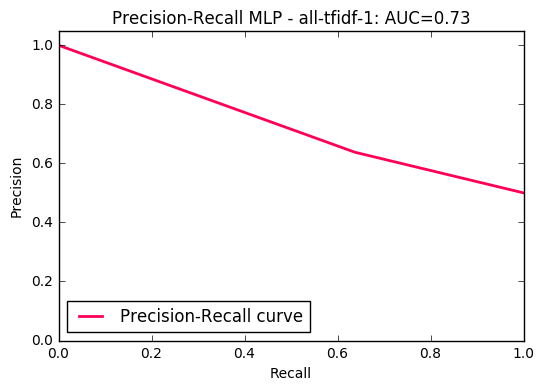

In [106]:
# Plot Precision-Recall curve
plt.clf()
plt.plot(recall, precision, lw=2, color='#ff0055',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall MLP - all-tfidf-1: AUC={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")
plt.show()